# Colaboratoryで実行する場合
以下を実行して、外部ファイルをダウンロードしてください。   
**このセルはColaboratoryを起動するたびに必要となります**   

In [ ]:
##################################
### Colaboratoryのみ以下を実行 ###
##################################
import sys
if 'google.colab' in sys.modules:
    !wget -P ./img http://www.hal.t.u-tokyo.ac.jp/~yamakata/lecture/mediaproc/mediaproc5/mediaproc5-1.zip
    !unzip img/mediaproc5-1.zip -d img/

# 画像処理１：画像の記録形式

画像がコンピュータ上でどのように記録されているかを学んだ後、簡単な画像処理をやってみましょう。

なお、本資料で使用している説明画像の一部はウィキペディアから引用しています。ここに感謝の意を表します。


## 1. 画像の記録形式

### 1.1 グレースケール画像 (Gray-scale image)

グレースケール画像（濃淡画像とも呼ばれる）は、赤や青のような色の情報を持たず、白・黒・灰色のみからなる画像形式です。  
濃淡値は真っ白から真っ黒まで多段階で表現されます。   
濃淡レベルを何階調にするかはその画像の用途によって変わります。最もよく使われるのは1画素あたり8-bitで濃淡値を表すものです。   
この値をビット深度と呼びます（音の情報処理でも「ビット深度」が出てきましたね。音のほうは、1サンプルを何ビットで表すかを意味しました）。   
通常のソフトウェアでサポートされているビット深度は１画素あたり8-bit, 16-bit, 32-bitです。

ビット深度が8-bitのとき、$2^8 = 256$ですので、濃淡レベルは256階調で表現されることになります。   
$0$が真っ黒、最大値（ビット深度が8-bitの場合$255$、ビット深度が16-bitの場合は$65535$）が真っ白に対応します。


ビット深度： uint8
画像サイズ（画素数）: (16, 16)
画像データを数値として書き出し:
 [[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 241 208 198 187 177 222 255 255 255 255 255]
 [255 255 255 253 219 182 161 141 120  99  78 118 241 255 255 255]
 [255 255 254 230 203 182 161 141 120  99  78  57  77 241 255 255]
 [255 255 247 224 203 182 161 141 120  99  78  57  37  98 255 255]
 [255 255 244 224 203 182 161 141 120  99  78  57  37  27 212 255]
 [255 255 244 224 203 182 161 141 120  99  78  57  37  27 141 255]
 [255 255 244 224 203 182 161 141 120  99  78  57  37  27 112 255]
 [255 255 244 224 203 182 161 141 120  99  78  57  37  27 141 255]
 [255 255 244 224 203 182 161 141 120  99  78  57  37  27 141 255]
 [255 255 244 224 203 182 161 141 120  99  78  57  37  27 212 255]
 [255 255 247 224 203 182 161 141 120  99  78  57  37  98 255 255]
 [255 255 254 230 203 182 161 141 120  99  78  57  77 241 255 255]
 [255 255 255 253 219 182 161 141 120  99  78 118 241 255 255 255]
 [255 255 

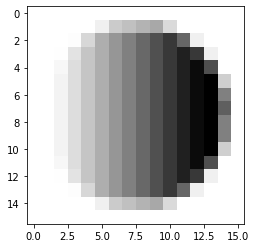

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

img_gray = cv2.imread('img/grayscale.bmp', cv2.IMREAD_ANYDEPTH)
plt.imshow(img_gray, 'gray')

print('ビット深度：', img_gray.dtype)
print('画像サイズ（画素数）:', img_gray.shape)
print('画像データを数値として書き出し:\n', img_gray)


### 1.2 二値画像（Bianry image)

文字のみが印刷されている紙面をスキャンして画像にする場合、文字が黒、背景が白と、白か黒の2色しか必要ありません。   
このような白黒画像（2階調）をグレースケール（たとえば256階調）として保存すると無駄にファイルサイズが大きくなってしまうので、
0か1のみからなる画像形式で保存します。   
これを二値画像 (Binary image)と呼びます。   
二値画像ではビット深度は1-bitですが、opencvでは読み込んだ時点で8-bitに変換します。


ビット深度： uint8
画像サイズ（画素数）: (16, 16)
画像データを数値として書き出し:
 [[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255   0 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255   0 255 255 255 255 255 255 255 255 255]
 [255 255   0   0   0   0   0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255   0 255 255 255 255 255 255]
 [255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255]
 [255 255 255 255   0   0 255 255 255   0 255   0 255 255 255 255]
 [255 255 255   0 255   0 255 255   0 255 255 255   0 255 255 255]
 [255 255   0 255 255   0 255 255   0 255 255 255 255   0 255 255]
 [255   0 255 255 255   0 255   0 255 255 255 255 255   0 255 255]
 [255   0 255 255 255 255   0 255 255 255 255 255 255   0 255 255]
 [255   0 255 255   0   0   0 255 255 255 255 255   0 255 255 255]
 [255 255   0   0 255 255 255 255 255 255 255   0 255 255 255 255]
 [255 255 

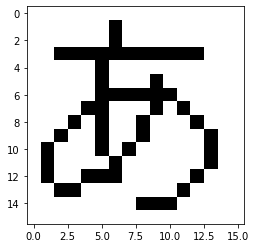

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

img_binary = cv2.imread('img/binary.bmp', cv2.IMREAD_UNCHANGED)
plt.imshow(img_binary, 'gray')

print('ビット深度：', img_binary.dtype)
print('画像サイズ（画素数）:', img_binary.shape)
print('画像データを数値として書き出し:\n', img_binary)

### 1.3 カラー画像 (Color image)

一般的なカラー画像の表現では、赤(R)、緑(G）、青(B)の3枚の画像の重ね合わせで色を表現しています。   
この3枚の画像をそれぞれチャネルと呼びます。グレースケール画像や二値画像は1チャネル、RGBのカラー画像は3チャネルです。

とにかく読み込んでデータの中身を見てみましょう。   
この画像はサイズが縦横16画素で、1画素あたり8-bit×RGBの3枚の画像からなるカラー画像です。  
真っ黒のときは(0, 0, 0)、真っ白のときは(255, 255, 255)ですね。   
また0チャネル(R)だけが255で残りが0のとき赤、1チャネル(G)だけが255で残りが0のとき緑、
2チャネル(B)だけが255で残りが0のとき青です。

ビット深度： uint8
画像サイズ（画素数）: (16, 16, 3)
画像データを数値として書き出し(縦1行分）:
 [[  0   0   0]
 [255   0   0]
 [  0 255   0]
 [  0   0 255]
 [  0 255 255]
 [255   0 255]
 [255 255   0]
 [255 255 255]
 [125   0   0]
 [  0 125   0]
 [  0   0 125]
 [  0 125 125]
 [125   0 125]
 [125 125   0]
 [125 125 125]
 [  0   0   0]]


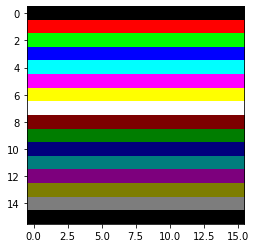

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

img_rgb = cv2.imread('img/color.bmp') # 画像の読み込み

# opencvでは3つのチャネルは実はRGBの順番ではなくBGRの順番でで読み込んでいます
# 一方、plt.imshow()はRGBの順番に並んでいるとみなして画像を表示します
# ですから以下の関数でRGBの並びに変換する必要があります
img_rgb= cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

print('ビット深度：', img_rgb.dtype) # 1画素あたりのビッド深度 (8-bitなら256快調)
print('画像サイズ（画素数）:', img_rgb.shape) # 画像のサイズ
print('画像データを数値として書き出し(縦1行分）:\n', img_rgb[:,1,:]) # 縦方向に一行抜き出して、3つのチャネルの値の移り変わりを見てみましょう


上の配列の書き出しでは、画像の縦1列分のRGBの値を出力している点に注意してください（全部書き出すと、16x16x3のデータになります）。

## 2.様々な色空間

赤・シアン眼鏡で見てみましょう。

### 2.1 RGB色空間（光の三原色・加法混合）

1.3で生成した画像からもわかるように、コンピュータ上ではカラー画像はR(赤)、G(緑)、B(青)の3種類の色画像を持ち、その色の交わり具合によってさまざまな色が表現されています。   
人間の網膜には特定の波長に反応する錐体細胞と呼ばれる細胞が散らばっています。   
ほとんどのヒトはS・M・Lの3つの錐体細胞を持つ3色型色覚です。   
このとき、Sは青色の波長、Mは緑色の波長、Lは赤色の波長に強く反応します。  
RGB色空間は、この人間の目の仕組みを再現しています。   

RGB色空間では、色は足せば足すほど白に近づきます。   
太陽の光は色を持たないように見えますが、これは様々な波長の光が混ざっているためです。   
このように、様々な波長（＝色）の光を加えて色を作る方法は加法混合と呼ばれます。   
また、RGBは光の三原色と呼ばれます。

下の図はRGBの光を混ぜるとどのような色になるかを表しています。   

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e8/AdditiveColorMixiing.svg" width=240>   
[Wikipedia:File:AdditiveColorMixiing.svg](https://commons.wikimedia.org/wiki/File:AdditiveColorMixiing.svg) より引用

### 2.2 CMYK色空間（色の三原色・減法混合）

一方、絵の具のようにいろいろな色を混ぜれば混ぜるほど黒に近づく色の作り方は減法混合と呼ばれます。   
赤色の絵の具は、無色の光（＝様々な波長が混ざった光）のうち、赤い波長以外の光を吸収して熱に変え、赤い波長の光のみを反射する塗料です。だから赤に見えるのですね。   
いろんないろの絵の具を混ぜるということは、つまりいろんな波長の光を吸収する素材を混ぜるということで、混ぜられた絵の具は様々な波長を吸収光をどんどん吸収することになり、ついには黒に近づくわけです。   
光の三原色ではRGBでしたが、加法混合ではシアン（Cyan)・マゼンタ（Magenta)・イエロー（Yellow)の3つの色が原色で、これを色の三原色と呼びます。
下の図は色の三原色を混ぜるとどのような色になるかを表しています。

<img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/SubtractiveColorMixing.png" width=240>   
[Wikipedia:File:SubtractiveColorMixing.png](https://commons.wikimedia.org/wiki/File:SubtractiveColorMixing.png) より引用

光の三原色と色の三原色を比べてみると、Rに対してCが互いに補色（その色が混ざっていないときの色）になっていることに注目してください。   
同じくGに対してはMが、Bに対してはYが補色です。

RGB色空間で表現された画像を、その補色画像に変換してみましょう。  
この画像、見覚えありませんか？（若い皆さんはないかもしれませんね…。）
これはフィルムカメラのいわゆる「ネガフィルム」の色です（「ネガ」はnegativeの略です）。   


Text(0.5, 1.0, 'negative image')

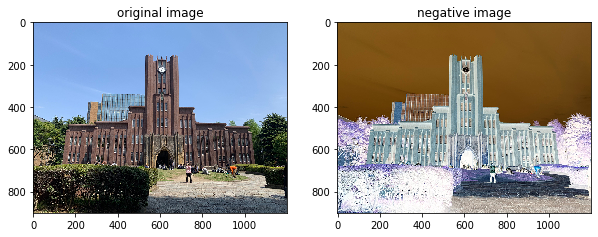

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

img_rgb = cv2.imread('img/UTokyoYasudaMini.jpg') # 画像の読み込み
img_rgb= cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB) # BGRからRGBに変換

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_rgb) # rgb画像の表示
plt.title('original image')

img_cmy = np.uint8(255 * np.ones(img_rgb.shape) - img_rgb) # 255からカラー画像を引くとネガ画像になります
plt.subplot(1,2,2)
plt.imshow(img_cmy)
plt.title('negative image')



### 2.3 HSV色空間

RGB色空間は人間の目の仕組みを模倣していますが、色や明暗や鮮やかさなどの連続的な変化を表すには不向きです。   
例えば同じ色の物体でも、陰になればそれだけ暗い色に移りますが、同じ色として扱いたいですよね。   
このような場合は色相 (hue)、彩度 (saturation)、明度 (value) の3つの色からなるHSV色空間が使えます。


<img src="https://upload.wikimedia.org/wikipedia/commons/f/f1/HSV_cone.jpg" width=240>   
[Wikipedia:File:HSV cone.jpg](https://commons.wikimedia.org/wiki/File:HSV_cone.jpg) より引用

彩度(S)と明度(V)はRGBと同様、0から255（各チャネル8-bitの場合）ですが、
色相は下の図のようにぐるっと一周、周ると元に戻る色空間ですので、360度の角度で表します。   
ただし、原画像と同じデータサイズだと、0～255までしか表現できないので、1度を1階調に割り当てると、256以上の角度は表現できません。     
そこで、opencvでは`cv2.cvtColor([元の画像], cv2.COLOR_RGB2HSV)`という関数でHSV色空間に変換すると、
Hの画像は1階調あたり2度として、180度まで(0～179)までの値に変換されます。   
ただし、`cv2.cvtColor([元の画像], cv2.COLOR_RGB2HSV_FULL)`のように、フラグにFULLをつけると、0～359までの値に変換します。

安田講堂の写真について、色相H, 彩度S, 明度V 情報を三枚の画像に分離して、それぞれを表示してみましょう。   


Text(0.5, 1.0, 'V image')

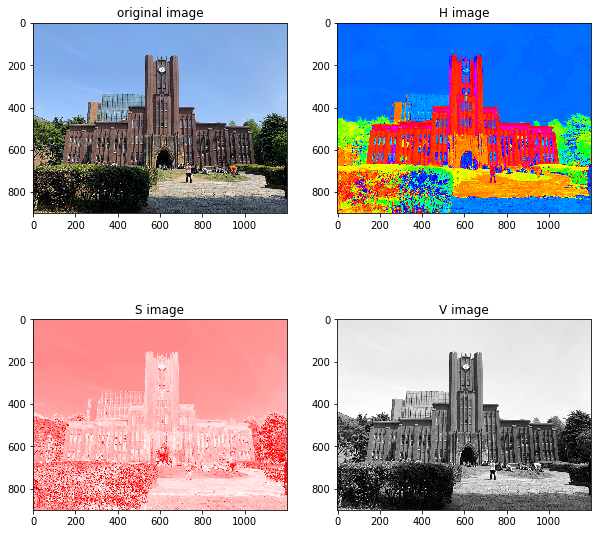

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

img_org = cv2.imread('img/UTokyoYasudaMini.jpg')
img_rgb= cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB) # まずはBGRをRGBに変換
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title('original image')

img_hsv= cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV) # RGBをHSVに変換

# img_hsvと同じ大きさの白い画像img_hを用意し、Hのみimg_hsvの値を代入
# SとVは255とします（鮮やかに明るく）
img_h = 255*np.ones_like(img_hsv)
img_h[:,:,0] = img_hsv[:,:,0]
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(img_h, cv2.COLOR_HSV2RGB))
plt.title('H image')

# img_hsvと同じ大きさの白い画像img_sを用意し、Sのみimg_hsvの値を代入
# Hは0（どの値でもいいです。0だと赤付近なので赤っぽい画像になります）
# Vは255（つまりなるべく明るい画像にします）
img_s = 0*np.ones_like(img_hsv)
img_s[:,:,1] = img_hsv[:,:,1]
img_s[:,:,2] = 255*np.ones_like(img_hsv[:,:,1])
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(img_s, cv2.COLOR_HSV2RGB))
plt.title('S image')

# img_hsvと同じ大きさの白い画像img_vを用意し、Vのみimg_hsvの値を代入
# HとSは0（実はどの値でも同じです。HSVの三角錐で色の関係を見てみてください。）
img_v = np.zeros_like(img_hsv)
img_v[:,:,2] = img_hsv[:,:,2]
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(img_v, cv2.COLOR_HSV2RGB))
plt.title('V image')


色相(H)空間をあらわす`H image`を見てください。   
安田講堂部分は赤レンガなので、色相(H)空間で見ると赤になっていることが分かりますね。  
また、空は青空なので青、木は緑です。

彩度(S)空間`S image`では、値が大きいほど「鮮やか」であることを意味します。   
`S image`画像が赤っぽいのは、HSVのうちHを0つまり赤にしているためです。   
ここでは色ではなく濃淡に注目してください（赤が濃いSの値が大きく、白っぽいほどSの値が小さいと考えてください）。   
空のほうが安田講堂よりも赤が濃いので鮮やかなようです。   
一方、安田講堂はRGB画像を見ると色は濃く見えますが、鮮やかさは低いので彩度画像では白っぽく（つまり値が小さく）見えます。   
また、手前の木に注目すると、RGBカラー画像では光の当たり具合によって明暗がくっきり分かれていますが、
彩度の画像ではあまり色の変化が見られません。   
光の当たり具合や陰による色の変化は主に明度を表すVの空間に現れ、
Sの空間ではあまり影響を及ぼしません。

明度(V)空間`V image`は、まさに画像の明るさを表していますね。   
カラー画像をグレースケール画像に変換するときは、この明度空間の画像を使うのが一般的です。